# Gaussian Classifier for Generative Data Model

The **pdf** (*probability density function*) of Multivariate Normal Distribution is defined as:

$$
\mathcal{N}(x|\mu, \Sigma) := \frac{1}{(2\pi)^{\frac{n}{2}} } exp\left( - \frac{1}{2} (x-\mu)^T \Sigma^{-1} (x-\mu) \right)
$$

where **mean vector** $\mu$ and **covariance matrix** $\Sigma$ for 2-dimensional could be as following:

$$
\mu = \begin{bmatrix}
0\\
0\\
\end{bmatrix}
, \Sigma = \begin{bmatrix}
1 & 0\\
0 & 1\\
\end{bmatrix}
$$

Furthermore, $x$ can be defined as:

$$
x \sim \mathcal{N}(\mu,\,\Sigma)\,.
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Median parameter
mu_x = 0
mu_y = 0

# Variance parameter
variance_x = 1
variance_y = 1

#Create grid and multivariate normal
x = np.linspace(-5,5,200)
y = np.linspace(-5,5,200)
X, Y = np.meshgrid(x,y)

# # Pack X and Y into a single 3-dimensional array
pos = np.empty((X.shape[0], X.shape[1], 2))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# random variable
rv = multivariate_normal([mu_x, mu_y], [[variance_x, 0], [0, variance_y]])
Z = rv.pdf(pos)

## Visualization

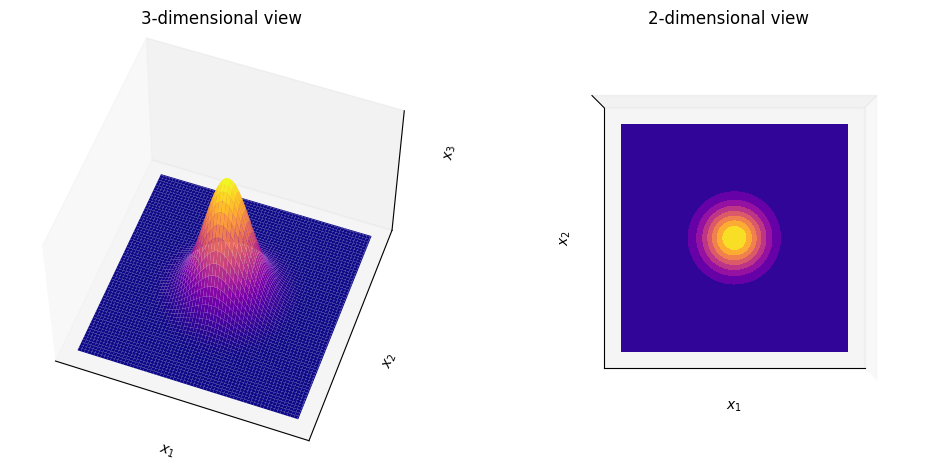

In [2]:
# plot using subplots
fig = plt.figure(figsize = (12, 8))

ax1 = fig.add_subplot(1, 2 , 1, projection='3d')
ax1.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=0, antialiased=True, cmap=cm.plasma)
ax1.view_init(55,-70)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_zticks([])
ax1.set_xlabel(r'$x_1$')
ax1.set_ylabel(r'$x_2$')
ax1.set_zlabel(r'$x_3$')
ax1.set_title("3-dimensional view")

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.contourf(X, Y, Z, zdir='z', offset=0, cmap=cm.plasma)
ax2.view_init(90, 270)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_zticks([])
ax2.set_xlabel(r'$x_1$')
ax2.set_ylabel(r'$x_2$')
ax2.set_title("2-dimensional view")

plt.show()

## Maximum Likelihood Estimate (MLE) of Mean and Variance
$ML$ := Maximum Likelihood

$$
\mu_{ML} = \frac{1}{N}\Sigma_i x_i
$$

$$
\Sigma_{ML} = \frac{1}{N}\Sigma_i^N (x_i - \bar{x})(x_i - \bar{x})^T
$$

## The Model

Let's traing a model with two classes (binary). Then, for a given $x$ we want to estimate $p(y=1|x)$ and $p(y=2|x)$. We can use Bayes theorem:

$$
p(y=c|x)=p(x|y=c) p(y=c)
$$


It is called Gaussian classifier due to the assumption that $p(x|y=X)$ is a Gaussian distribution. It is also known as "Mixture Gaussian" and "Discriminant classifier"

In [3]:
class GaussianClassifier:
    # simple binary model
    
    def fit(self, X, y):
        
        # Class-conditional density - MLE Estimate
        self.mean_0 = np.average( X[y == 0], axis = 0)
        self.mean_1 = np.average( X[y == 1], axis = 0)
        self.sigma_0 = np.cov( X[y == 0], rowvar = False)
        self.sigma_1 = np.cov( X[y == 1], rowvar = False)
        
        # Class prior
        self.pi_0 = y[y==0].shape[0]/y.shape[0]
        self.pi_1 = 1 - self.pi_0
        
        # Multivariante class-conditional pdf
        self.prob_0 = multivariate_normal(self.mean_0, self.sigma_0, allow_singular = True)
        self.prob_1 = multivariate_normal(self.mean_1, self.sigma_1, allow_singular = True)
        
    def predict(self, X):
        preds = []
        
        for x in X:
            if self.prob_0.pdf(x) * self.pi_0 > self.prob_1.pdf(x) * self.pi_1:
                preds.append(0)
            else:
                preds.append(1)
                
        return np.array(preds)
            
        


## Training on Data

In [4]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = data.data, data.target

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [6]:
model = GaussianClassifier()
model.fit(X_train, y_train)

In [7]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9122807017543859

## Generative Model 

We select only 2 features of the dataset for simplicity

In [8]:
import pandas as pd
import seaborn as sns

data = load_breast_cancer()
X, y = data.data, data.target

x1 = X[:, 0].reshape(-1, 1)
x2 = X[:, 1].reshape(-1, 1)

df = pd.DataFrame(X[:, 0:2], columns = ["x1", "x2"])
df['class'] = y
df.head()

,x1,x2,class
0,17.99,10.38,0
1,20.57,17.77,0
2,19.69,21.25,0
3,11.42,20.38,0
4,20.29,14.34,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      569 non-null    float64
 1   x2      569 non-null    float64
 2   class   569 non-null    int32  
dtypes: float64(2), int32(1)
memory usage: 11.2 KB


In [10]:
X, y = df.drop(['class'], axis = 1).values, df['class'].values
               
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

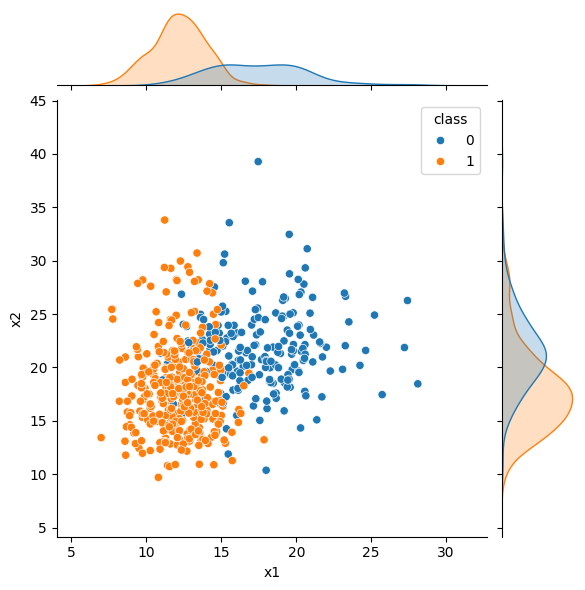

In [11]:
sns.jointplot(data = df, x="x1", y="x2", hue = "class")

In [12]:
model = GaussianClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9035087719298246

### Draw random samples from the multivariate normal distribution.

In [13]:
df['class'].value_counts()

class
1    357
0    212
Name: count, dtype: int64

In [14]:
class_0_generative = model.prob_0.rvs(212)
class_1_generative = model.prob_1.rvs(357)

In [15]:
y_class_0 = np.array([0] * len(class_0_generative)).reshape(-1, 1)
y_class_1 = np.array([1] * len(class_1_generative)).reshape(-1, 1)

In [16]:
class_0_samples = np.hstack((class_0_generative,y_class_0))
class_1_samples = np.hstack((class_1_generative,y_class_1))

In [17]:
sample_data = np.vstack((class_0_samples, class_1_samples))
sample_data = pd.DataFrame(sample_data, columns = ["x1", "x2", "class"])
sample_data.head()

,x1,x2,class
0,19.164665,18.590690,0.0
1,18.215760,22.484454,0.0
2,17.500651,13.714940,0.0
3,13.942402,19.314145,0.0
4,19.935517,19.036182,0.0


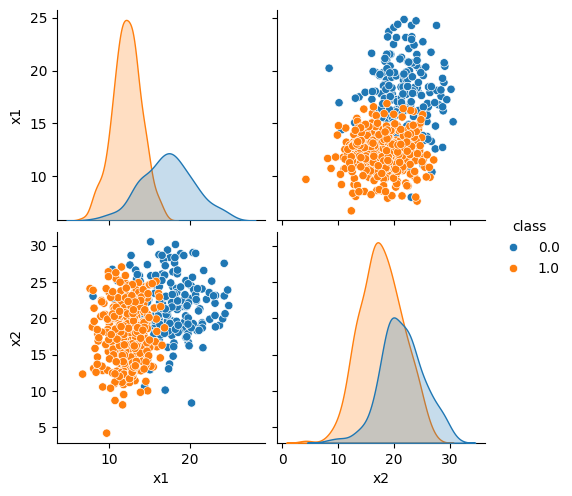

In [18]:
sns.pairplot(data = sample_data, hue = "class")

C:\Users\ivanr\AppData\Local\Temp\ipykernel_11068\3157977281.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = df, x="x1", y="x2", hue = "class", ax = axes[0, 0], shade = False)
C:\Users\ivanr\AppData\Local\Temp\ipykernel_11068\3157977281.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = sample_data, x="x1", y="x2", hue = "class", ax = axes[1, 0], shade = False)


Text(0.5, 1.0, 'Generative data')

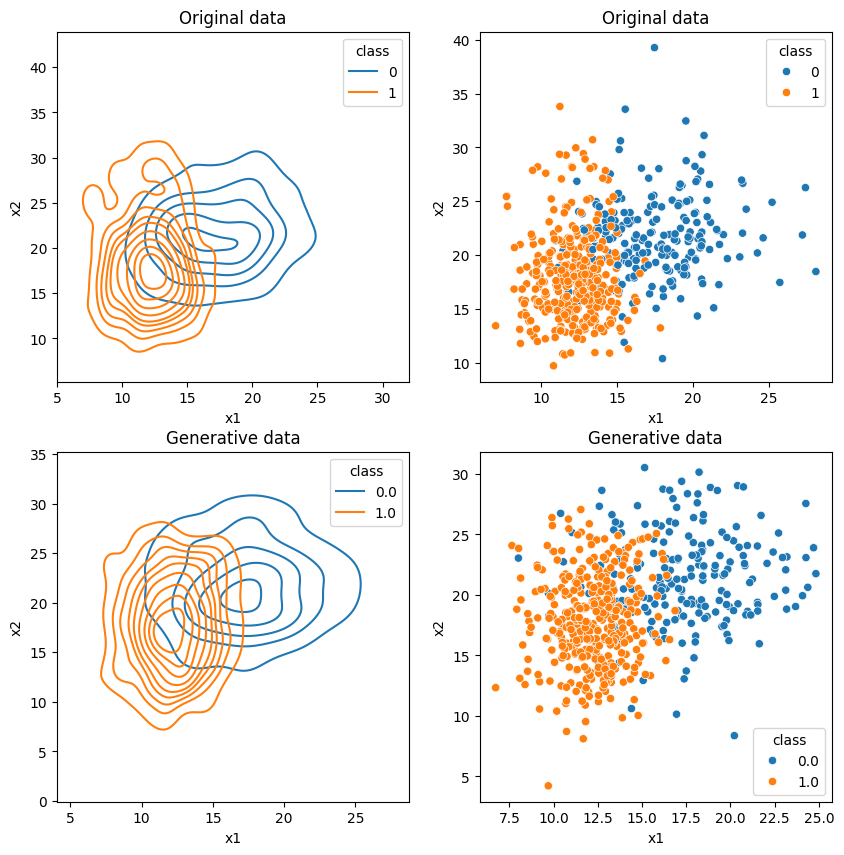

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))

sns.kdeplot(data = df, x="x1", y="x2", hue = "class", ax = axes[0, 0], shade = False)
axes[0, 0].set_title('Original data')

sns.scatterplot(data = df, x="x1", y="x2", hue = "class", ax = axes[0, 1])
axes[0, 1].set_title('Original data')

sns.kdeplot(data = sample_data, x="x1", y="x2", hue = "class", ax = axes[1, 0], shade = False)
axes[1, 0].set_title('Generative data')

sns.scatterplot(data = sample_data, x="x1", y="x2", hue = "class", ax = axes[1, 1])
axes[1, 1].set_title('Generative data')

C:\Users\ivanr\AppData\Local\Temp\ipykernel_11068\1343931242.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = df, x="x1", hue = "class", ax = axes[0, 0], shade = True)
C:\Users\ivanr\AppData\Local\Temp\ipykernel_11068\1343931242.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = df, x="x2", hue = "class", ax = axes[0, 1], shade = True)
C:\Users\ivanr\AppData\Local\Temp\ipykernel_11068\1343931242.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = sample_data, x="x1", hue = "class", ax = axes[1, 0], shade = True)
C:\Users\ivanr\AppData\Local\Temp\ipykernel_11068\1343931242.py:12: FutureWarning: 



Text(0.5, 1.0, 'Generative data')

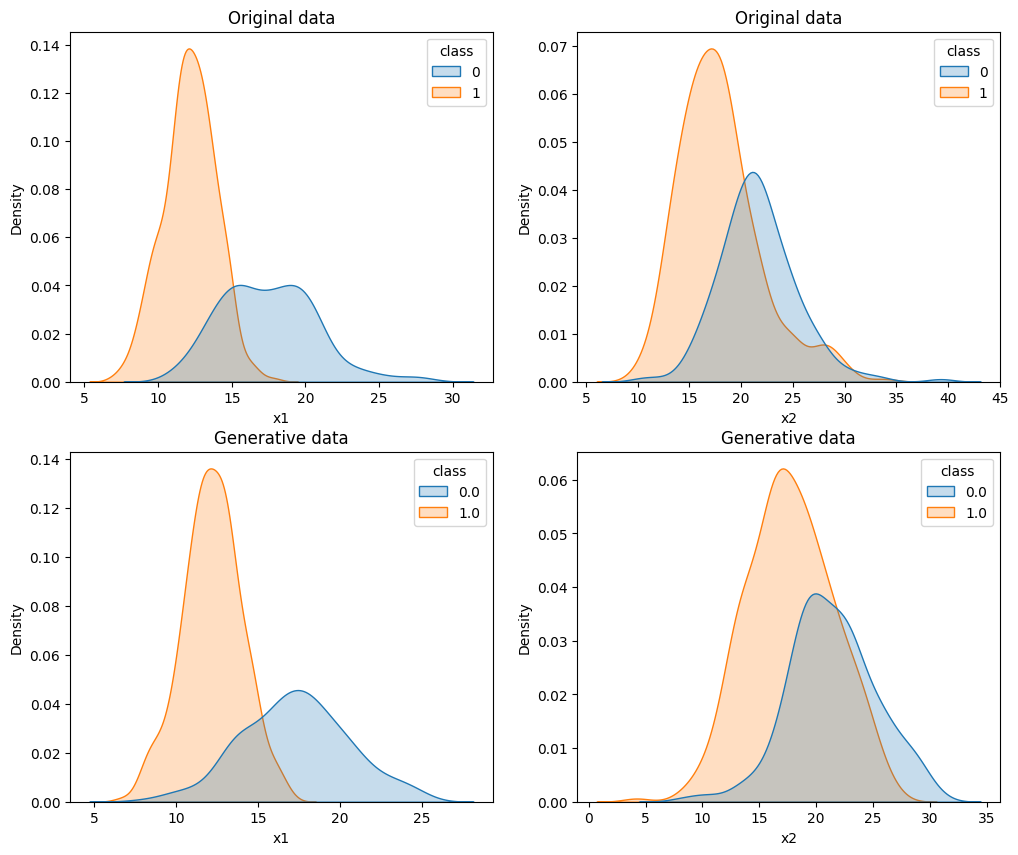

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(12,10))

sns.kdeplot(data = df, x="x1", hue = "class", ax = axes[0, 0], shade = True)
axes[0, 0].set_title('Original data')

sns.kdeplot(data = df, x="x2", hue = "class", ax = axes[0, 1], shade = True)
axes[0, 1].set_title('Original data')

sns.kdeplot(data = sample_data, x="x1", hue = "class", ax = axes[1, 0], shade = True)
axes[1, 0].set_title('Generative data')

sns.kdeplot(data = sample_data, x="x2", hue = "class", ax = axes[1, 1], shade = True)
axes[1, 1].set_title('Generative data')

## Sampling virtual outliers

Thus, a very likely data point could be composed by the mean of the feature values

In [21]:
class_0_samples[:, 0].mean(), class_1_samples[:, 1].mean()

(17.268342825008816, 17.722912483444812)

In [22]:
test_data_point = np.array([17.672435156981877, 17.83068895617671])
probs = model.prob_0.pdf(test_data_point)
print("Probability of likely data-point: ", probs*100, "%")

Probability of likely data-point:  0.7939552059825583 %


On the other hand, an outlier must be within a low probability

In [23]:
test_data_point = np.array([10, 10])
probs = model.prob_0.pdf(test_data_point)
print("Probability of likely data-point: ", probs*100, "%")

Probability of likely data-point:  0.0017200437287999651 %


Then, we could sample outliers as following

In [24]:
# size of the e-likelihood region
eps = 0.0001

In [25]:
probs = model.prob_0.pdf(class_0_samples[:, 0:2])
probs[0:10]

array([0.00801444, 0.01183715, 0.00163644, 0.00633379, 0.00741524,
       0.00797094, 0.01047462, 0.01202494, 0.01107094, 0.00559907])

In [26]:
outliers = np.where(probs < eps)
print("Indices of outliers: ", outliers)

Indices of outliers:  (array([163], dtype=int64),)


In [27]:
print("Probability of outliers: ", probs[outliers])

Probability of outliers:  [2.23595692e-05]


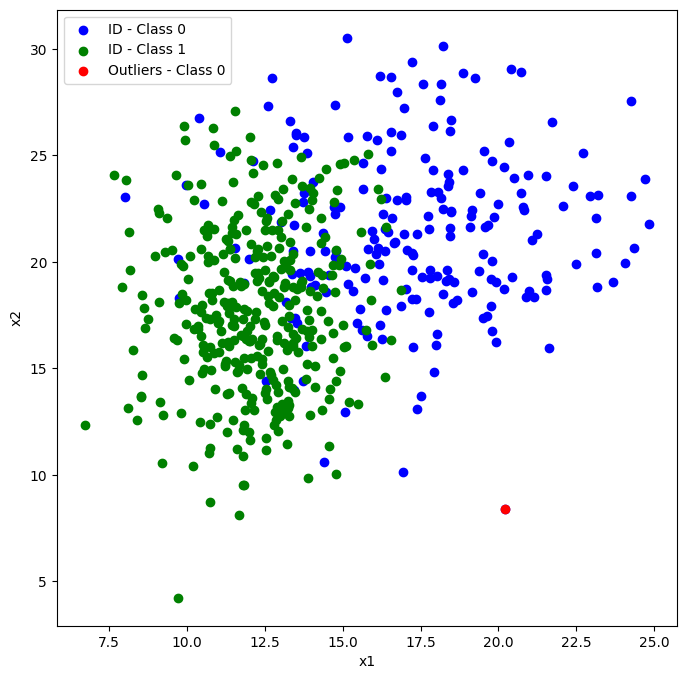

In [28]:
plt.figure(figsize = (8,8))

plt.scatter(class_0_samples[:, 0], class_0_samples[:, 1], c = "b", label = "ID - Class 0")
plt.scatter(class_1_samples[:, 0], class_1_samples[:, 1], c = "g", label = "ID - Class 1")

plt.scatter(class_0_samples[outliers, 0], class_0_samples[outliers, 1], c = "r", label = "Outliers - Class 0")

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()